## **CNN: Text Modality**

Se usa una arquitectura que consiste en redes neuronales convolucionales. En el paper se menciona el uso de un modelo word2vec pre-entrenado discutido en otro paper, como no se tiene acceso a este modelo se prefirió optar por otras alternativas similares pero manteniendo el uso de word2vec con 300 dimensiones.

In [2]:
!pip install tensorflow
import tensorflow.keras

2025-11-26 02:19:36.806092: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
!pip install nltk
!pip install tensorflow
!pip install torch

In [4]:
import pandas as pd
import re

### **Preprocesamiento**
"we preprocess them by removing stop words, non-ASCII charachters, numbers, URLs and hashtag signs. we also replace all punctuation marks with white spaces"

In [5]:
df_text = pd.read_csv('/home/jacruz/crisis/data/crisis_texts_dataset.csv')
df_text.head()

,tweet_id,text_info,text_info_conf,tweet_text
0,917791044158185473,informative,1.0000,RT @Gizmodo: Wildfires raging through Northern...
1,917791130590183424,informative,1.0000,PHOTOS: Deadly wildfires rage in California ht...
2,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...
3,917792092100988929,informative,0.6727,RT @TIME: California's raging wildfires as you...
4,917792147700465664,informative,0.7143,Wildfires Threaten Californiaâ€™s First Legal ...


In [6]:
# Para el manejo de stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(['rt', 'RT'])
print(stop_words)


{'am', 'yourself', 'about', 'him', 'which', 'm', "needn't", 'has', 'doesn', 'its', 'you', 'with', 'did', 'mightn', 'few', 'up', 'it', 'ma', 'itself', 'hadn', 'myself', "doesn't", 'will', 'some', 'into', 'during', 'because', 'both', 'them', "i'll", 'shouldn', "should've", 'theirs', 'that', 'what', 'couldn', "couldn't", 'these', 'if', 'is', 'doing', 'here', "she'll", 'all', "you've", 'against', 'RT', "you'd", 'our', 'who', "hadn't", 'don', 'isn', 'themselves', 'as', 'had', 'but', 're', 'having', 'very', "weren't", "i've", 'y', 'any', 'nor', 'the', 'my', 'yours', 'when', 'was', 'does', 'those', 'not', 'an', 'ours', 'below', 'rt', 'i', 'now', 'her', 'are', 'herself', "shouldn't", 'own', 'such', 'than', "we're", "we've", 'me', 'his', 'more', 'at', 'their', 'down', 'll', "she'd", 'they', "we'll", 'were', 'wasn', 'ourselves', 'haven', 'whom', 'through', 'himself', 'a', 'of', 'from', 'to', "didn't", 'while', "i'm", 'only', "that'll", "they'd", "they're", 'weren', 'hasn', "she's", 'off', 'she',

[nltk_data] Downloading package stopwords to /home/jacruz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def clean_text(text):
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Eliminar caracteres no ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Reemplazar signos de puntuación con espacios
    text = re.sub(r'[^\w\s]', ' ', text)
    # Convertir a minúsculas y eliminar stopwords
    text = ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words])
    return text

In [8]:
clean_text("RT alooooooo #happy http://example.com 123!!!")

'alooooooo happy'

In [9]:
df_text['clean_text'] = df_text['tweet_text'].apply(clean_text)
df_text.head(100)

,tweet_id,text_info,text_info_conf,tweet_text,clean_text
0,917791044158185473,informative,1.0000,RT @Gizmodo: Wildfires raging through Northern...,gizmodo wildfires raging northern california t...
1,917791130590183424,informative,1.0000,PHOTOS: Deadly wildfires rage in California ht...,photos deadly wildfires rage california
2,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,cal_oes pls share capturing wildfire response ...
3,917792092100988929,informative,0.6727,RT @TIME: California's raging wildfires as you...,time california raging wildfires never seen
4,917792147700465664,informative,0.7143,Wildfires Threaten Californiaâ€™s First Legal ...,wildfires threaten californias first legal can...
...,...,...,...,...,...
95,917833987824979968,informative,0.6783,Satellite image of California last night. Thos...,satellite image california last night arent li...
96,917834588814155776,informative,0.6854,RT @AuroraWorldView: Deadly #California #wildf...,auroraworldview deadly california wildfires fo...
97,917834628290920448,informative,0.6667,Fire swept through Northern California early M...,fire swept northern california early monday mo...
98,917835067069788162,informative,1.0000,"Couple, ages 100 and 98, die in CaliforniaÂ wi...",couple ages die california wildfire


In [10]:
# Muestra aleatoria de textos limpios
import random
random.sample(list(df_text['clean_text']), 10)

['bullshit zinke pal get government',
 'unmigration launches million appeal cyclone mora response bangladesh',
 'caseyfrank yikes hollywood fl home fire windy fdp respond irma',
 'harvey related scams rise guns',
 'puerto rico taps start rd place game phlunitycup',
 'thankful partners opbbqrelief fedex flying tasty bbq communities',
 'two new babes oreo harvey',
 'canadian cargo plane sent texas aid post hurricane harvey relief effort',
 'irma weatherchannel tops tv news competition via bcbeat featuring ispottv data',
 'independent elon musk done something amazing puerto rico']

In [11]:
#dataset = tuple((row['informative'], row['clean_text']) for _, row in df_text.iterrows())
dataset = tuple(
    (row['text_info'], row['clean_text'])
    for _, row in df_text.iterrows() 
)
dataset[:5]

(('informative', 'gizmodo wildfires raging northern california terrifying'),
 ('informative', 'photos deadly wildfires rage california'),
 ('informative',
  'cal_oes pls share capturing wildfire response recovery info'),
 ('informative', 'time california raging wildfires never seen'),
 ('informative',
  'wildfires threaten californias first legal cannabis harvest'))

In [12]:
import torch
from torch.utils.data.dataset import random_split
from random import sample

# Proporciones
train_ratio = 0.75
dev_ratio = 0.15
test_ratio = 0.15

# Longitudes
train_len = int(len(dataset) * train_ratio)
dev_len = int(len(dataset) * dev_ratio)
test_len = len(dataset) - train_len - dev_len  # para evitar problemas de redondeo

# Dividimos el dataset
train_split, dev_split, test_split = random_split(dataset, [train_len, dev_len, test_len])

print(f"Tamaño del set de entrenamiento: {len(train_split)}")
print(f"Tamaño del set de validación: {len(dev_split)}")
print(f"Tamaño del set de prueba: {len(test_split)}")

# Mostramos algunos ejemplos
print("\nEjemplos del set de entrenamiento:")
for example in sample(list(train_split), 3):
    print(example)
print("\nEjemplos del set de validación:")
for example in sample(list(dev_split), 3):
    print(example)
print("\nEjemplos del set de prueba:")
for example in sample(list(test_split), 3):
    print(example)

Tamaño del set de entrenamiento: 12043
Tamaño del set de validación: 2408
Tamaño del set de prueba: 1607

Ejemplos del set de entrenamiento:
('not_informative', 'iris_epo iris special event page chiapas earthquake mexicoearthquake')
('not_informative', 'bvi bc repost richardbranson get_repost experience hurricane irma')
('not_informative', 'irma nfl jaboowins mikeevans_ wo bucs chivstb via twitter')

Ejemplos del set de validación:
('informative', 'help spread word hurricane irma donations visit facebook page learn')
('informative', 'mexico strong earthquake topples buildings killing scoresa strong earthquake struck central mexico killing')
('informative', 'drone footage shows damage three weeks harvey')

Ejemplos del set de prueba:
('informative', 'fundraising efforts taking irma ravaged carribbean')
('informative', 'irma refugios todavia disponibles en el condado hillsborough please share')
('not_informative', 'sh happened bucs win humanity losing general sense')


In [13]:
# Tokenización
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from collections import namedtuple

[nltk_data] Downloading package punkt_tab to /home/jacruz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [14]:
document = namedtuple('tweet', ['text', 'label'])

tokenized_train_set = [document(text=word_tokenize(d[1]), label=d[0]) for d in train_split]
train_set = pd.DataFrame(tokenized_train_set)

tokenized_dev_set = [document(text=word_tokenize(d[1]), label=d[0]) for d in dev_split]
dev_set = pd.DataFrame(tokenized_dev_set)

tokenized_test_set = [document(text=word_tokenize(d[1]), label=d[0]) for d in test_split]
test_set = pd.DataFrame(tokenized_test_set)

test_set.head()


,text,label
0,"[earthquake, destroys, hospital, worst, hit, a...",informative
1,"[tnmp, crews, continuing, post, irma, power, r...",informative
2,"[hurricane, irma, recovery, fund, island, neig...",informative
3,"[ohmtobacco, stranded, manatees, rescued, hurr...",informative
4,"[special, thank, seoalum, dee, dee, mckee, hel...",informative


In [15]:
# Convertir etiquetas a numéricas
label_mapping = {'informative': 1, 'not_informative': 0}
train_set['label'] = train_set['label'].map(label_mapping)
dev_set['label'] = dev_set['label'].map(label_mapping)
test_set['label'] = test_set['label'].map(label_mapping)

### **Arquitectura del modelo**

In [16]:
import gensim
from gensim.models import Word2Vec

In [17]:
# Jugando con Word2Vec
sentences = train_set['text'].tolist()  # Se pasa a lista de listas de tokens
w2v = Word2Vec(sentences, vector_size=300, window=5, min_count=5, workers=4)

vocab = list(w2v.wv.key_to_index.keys())

palabra_a_buscar = 'mexico'
print(f"El vocabulario tiene {len(vocab)} palabras")
print(f"Algunas palabras aleatorias del vocabulario: {sample(vocab, 10)}")

# Buscar palabras similares
w2v.wv.most_similar(palabra_a_buscar)
print(f"Palabras más similares a '{palabra_a_buscar}': {w2v.wv.most_similar(palabra_a_buscar)}")

# Similitud entre dos palabras
palabra1 = 'help'
palabra2 = 'support'
similarity = w2v.wv.similarity(palabra1, palabra2)
print(f"La similitud entre '{palabra1}' y '{palabra2}' es: {similarity}")

El vocabulario tiene 3063 palabras
Algunas palabras aleatorias del vocabulario: ['trailers', 'insurance', 'talking', 'blown', 'young', 'food', 'foreign', 'jose', 'national', 'feared']
Palabras más similares a 'mexico': [('iran', 0.9983213543891907), ('magnitude', 0.9964640140533447), ('border', 0.9964596033096313), ('city', 0.99629807472229), ('iraq', 0.9961880445480347), ('earthquake', 0.9943993091583252), ('kermanshah', 0.9933450222015381), ('hits', 0.9930151104927063), ('kills', 0.9926065802574158), ('powerful', 0.992501437664032)]
La similitud entre 'help' y 'support' es: 0.9996579885482788


In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
# Construcción del modelo 

class CNN:
    def __init__(self,
                 vocab_size,
                 embedding_matrix,
                 embedding_dim=300,
                 max_seq_len=100,
                 num_classes=2,
                 ):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.max_seq_len = max_seq_len
        self.num_classes = num_classes
        self.embedding_matrix = embedding_matrix
        self.model = self.build_model()

    def build_model(self):
        input_layer = layers.Input(shape=(self.max_seq_len,))
        x = layers.Embedding(input_dim=self.vocab_size,
                                           output_dim=self.embedding_dim,
                                           weights=[self.embedding_matrix],
                                           input_length=self.max_seq_len,
                                           trainable=False)(input_layer)
        # convoluciones
        conv_blocks = []
        conv1 = layers.Conv1D(filters=100,
                              kernel_size=2,
                              activation='relu',
                              padding='same')(x)
        # Se toma el valor máximo de cada filtro
        pool1 = layers.GlobalMaxPooling1D()(conv1)
        conv_blocks.append(pool1)
        conv2 = layers.Conv1D(filters=150,
                              kernel_size=3,
                              activation='relu',
                              padding='same')(x)
        pool2 = layers.GlobalMaxPooling1D()(conv2)
        conv_blocks.append(pool2)
        conv3 = layers.Conv1D(filters=200,
                              kernel_size=4,
                              activation='relu',
                              padding='same')(x)
        pool3 = layers.GlobalMaxPooling1D()(conv3)
        conv_blocks.append(pool3)

        # concatenar las salidas de las convoluciones
        concat = layers.Concatenate()(conv_blocks)

        # dropout para evitar overfitting apagando neuronas aleatoriamente
        x = layers.Dropout(0.02)(concat)
        
        x = layers.Dense(512, activation='relu')(x)
        x = layers.Dropout(0.02)(x)
        x = layers.Dense(256, activation='relu')(x)
        x = layers.Dropout(0.02)(x)
        x = layers.Dense(128, activation='relu')(x)
        x = layers.Dropout(0.02)(x)
        x = layers.Dense(64, activation='relu')(x)
        x = layers.Dropout(0.02)(x)
        x = layers.Dense(32, activation='relu')(x)
        x = layers.Dropout(0.02)(x)

        # capa de salida
        output_layer = layers.Dense(self.num_classes, activation='softmax')(x)
        model = models.Model(inputs=input_layer, outputs=output_layer)
        return model
    
    def compile_model(self):
        self.model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
        return self.model
    
    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
        early_stopping = [EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            restore_best_weights=True,
            verbose=1
        )]
        history = self.model.fit(X_train, y_train,
                                 validation_data=(X_val, y_val),
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 callbacks=[early_stopping])
        return history
    
    def evaluate(self, X_test, y_test):
        results = self.model.evaluate(X_test, y_test, verbose=0)
        return results

    def predict(self, X):
        predictions = self.model.predict(X, verbose=0)
        return predictions

In [20]:
# Corriendo el modelo

def embedding_matrix(word_index, w2v_model, embedding_dim=300):
    vocab_size = len(word_index) + 1
    # matriz de embedding inicializada en ceros
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in word_index.items():
        if word in w2v_model.wv:
            # si la palabra está en el vocabulario de word2vec
            embedding_matrix[i] = w2v_model.wv[word]
        else:
            # si la palabra no está, vector aleatorio
            embedding_matrix[i] = np.random.normal(0, 0.1, embedding_dim)
    return embedding_matrix



In [21]:
X_train = [' '.join(tokens) for tokens in train_set['text']]
y_train = train_set['label'].values

X_dev = [' '.join(tokens) for tokens in dev_set['text']]
y_dev = dev_set['label'].values

X_test = [' '.join(tokens) for tokens in test_set['text']]
y_test = test_set['label'].values

# Tokenización con Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convertir a secuencias
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_dev_seq = tokenizer.texts_to_sequences(X_dev)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Parámetros
vocab_size = len(tokenizer.word_index) + 1
max_seq_len = 100
embedding_dim = 300

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_len, padding='post')
X_dev_pad = pad_sequences(X_dev_seq, maxlen=max_seq_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_len, padding='post')

print(f"Tamaño del vocabulario: {vocab_size}")
print(f"Forma de X_train: {X_train_pad.shape}")
print(f"Forma de X_dev: {X_dev_pad.shape}")
print(f"Forma de X_test: {X_test_pad.shape}")

Tamaño del vocabulario: 18602
Forma de X_train: (12043, 100)
Forma de X_dev: (2408, 100)
Forma de X_test: (1607, 100)


In [22]:
import numpy as np

embedding_matrix = embedding_matrix(tokenizer.word_index, w2v, embedding_dim)
print(f"Forma de la matriz de embedding: {embedding_matrix.shape}")

Forma de la matriz de embedding: (18602, 300)


In [27]:
# Instanciar y compilar el modelo
cnn_model = CNN(vocab_size=vocab_size, 
                embedding_matrix=embedding_matrix,
                embedding_dim=embedding_dim,
                max_seq_len=max_seq_len,
                num_classes=2)

model = cnn_model.compile_model()
print("Resumen del modelo:")
model.summary()

# Entrenar el modelo
print("\nIniciando entrenamiento...")
history = cnn_model.train(
    X_train_pad, y_train,
    X_dev_pad, y_dev,
    epochs=1000,
    batch_size=32
)


Resumen del modelo:


/home/jacruz/.conda/envs/crisis-env/lib/python3.13/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 100, 300)  │  5,580,600 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 100, 100)  │     60,100 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 100, 150)  │    135,150 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 100, 200)  │    240,200 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 100)       │          0 │ conv1d_3[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 150)       │          0 │ conv1d_4[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 200)       │          0 │ conv1d_5[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 450)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 450)       │          0 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 512)       │    230,912 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 512)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 256)       │    131,328 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 256)       │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │     32,896 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128)       │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │      8,256 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64)        │          0 │ dense_9[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │      2,080 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32)        │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 6,421,588 (24.50 MB)

 Trainable params: 840,988 (3.21 MB)

 Non-trainable params: 5,580,600 (21.29 MB)


Iniciando entrenamiento...
Epoch 1/1000


377/377 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7390 - loss: 0.5574 - val_accuracy: 0.7396 - val_loss: 0.5346
Epoch 2/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7631 - loss: 0.5193 - val_accuracy: 0.7384 - val_loss: 0.5370
Epoch 3/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7895 - loss: 0.4828 - val_accuracy: 0.7458 - val_loss: 0.5405
Epoch 4/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8274 - loss: 0.4105 - val_accuracy: 0.7417 - val_loss: 0.5761
Epoch 5/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8666 - loss: 0.3296 - val_accuracy: 0.7267 - val_loss: 0.6545
Epoch 6/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8906 - loss: 0.2702 - val_accuracy: 0.7230 - val_loss: 0.8462
Epoch 7/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9131 - loss: 0.2203 - val_accuracy: 0.7301 - val_loss: 0.7663
Epoch 8/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9201 - loss: 0.2098 - val_accurac

In [31]:
from sklearn.metrics import classification_report

# Evaluar en test set
print("\n" + "="*60)
print("EVALUACIÓN EN CONJUNTO DE PRUEBA")
print("="*60)
test_loss, test_accuracy = cnn_model.evaluate(X_test_pad, y_test)
print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Predicciones
y_pred_proba = cnn_model.predict(X_test_pad)
y_pred = np.argmax(y_pred_proba, axis=1)

# Reporte de clasificación
print("\n" + "="*60)
print("REPORTE DE CLASIFICACIÓN")
print("="*60)
print(classification_report(y_test, y_pred, 
                          target_names=['Not Informative', 'Informative'],
                          digits=4))


EVALUACIÓN EN CONJUNTO DE PRUEBA
Loss: 0.5318
Accuracy: 0.7498

REPORTE DE CLASIFICACIÓN
                 precision    recall  f1-score   support

Not Informative     0.6875    0.1734    0.2770       444
    Informative     0.7545    0.9699    0.8488      1163

       accuracy                         0.7498      1607
      macro avg     0.7210    0.5717    0.5629      1607
   weighted avg     0.7360    0.7498    0.6908      1607



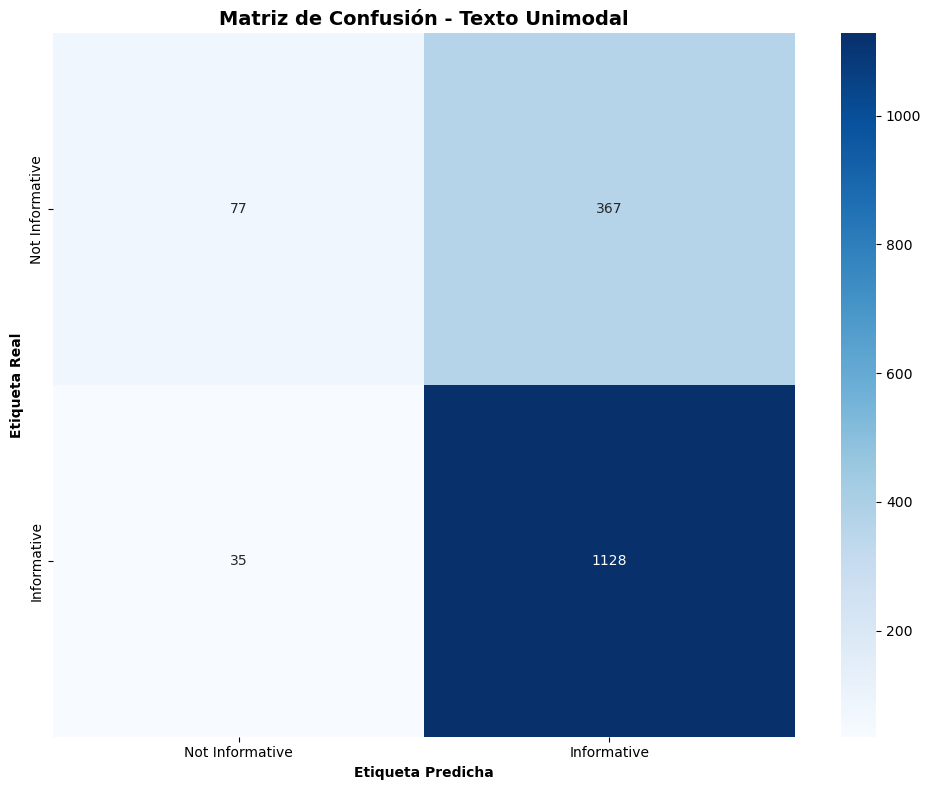

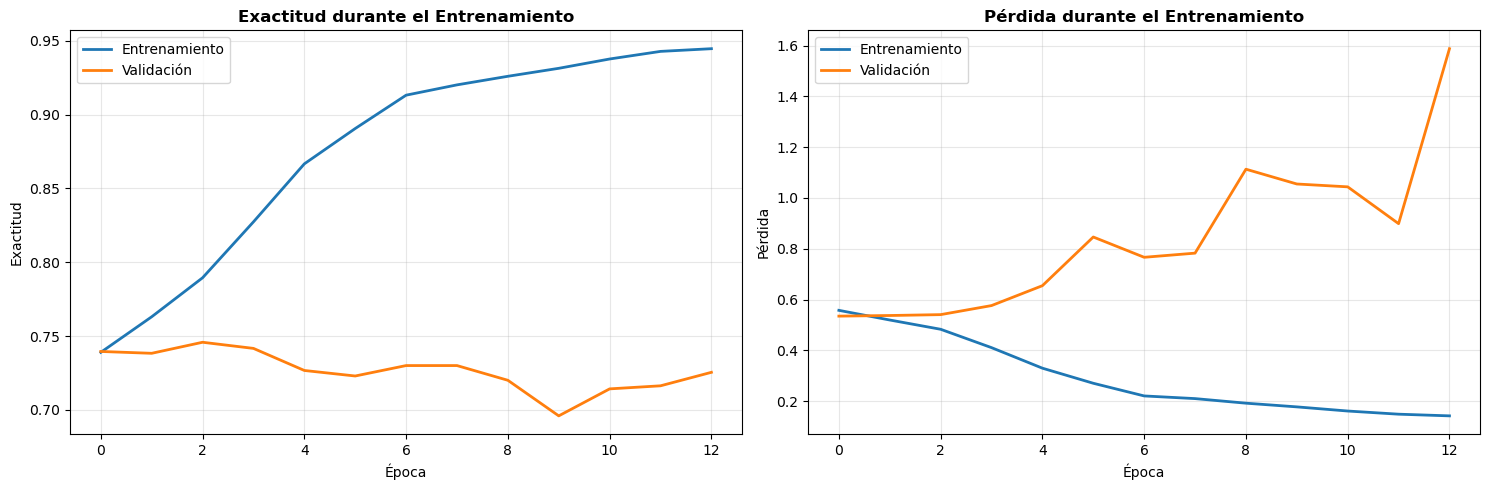

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Informative', 'Informative'],
            yticklabels=['Not Informative', 'Informative'])
plt.title('Matriz de Confusión - Texto Unimodal', fontsize=14, fontweight='bold')
plt.ylabel('Etiqueta Real', fontweight='bold')
plt.xlabel('Etiqueta Predicha', fontweight='bold')
plt.tight_layout()
plt.show()

# Curvas de aprendizaje
plt.figure(figsize=(15, 5))

# Exactitud
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validación', linewidth=2)
plt.title('Exactitud durante el Entrenamiento', fontsize=12, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.grid(True, alpha=0.3)

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento', linewidth=2)
plt.plot(history.history['val_loss'], label='Validación', linewidth=2)
plt.title('Pérdida durante el Entrenamiento', fontsize=12, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import f1_score

# Calcular F1-score de nuestro modelo
our_f1 = f1_score(y_test, y_pred)
print(f"\nNuestro modelo - F1-score: {our_f1:.4f}")

# Estadísticas del modelo
print(f"\nEstadísticas del modelo:")
print(f"- Tamaño del vocabulario: {vocab_size}")
print(f"- Longitud máxima de secuencia: {max_seq_len}")
print(f"- Dimensión de embedding: {embedding_dim}")
print(f"- Épocas entrenadas: {len(history.history['accuracy'])}")
print(f"- Mejor exactitud en validación: {max(history.history['val_accuracy']):.4f}")

# Guardar el modelo si es necesario
model.save('text_unimodal_cnn.h5')
print("\nModelo guardado como 'text_unimodal_cnn.h5'")


Nuestro modelo - F1-score: 0.8488

Estadísticas del modelo:
- Tamaño del vocabulario: 18602
- Longitud máxima de secuencia: 100
- Dimensión de embedding: 300
- Épocas entrenadas: 13
- Mejor exactitud en validación: 0.7458

Modelo guardado como 'text_unimodal_cnn.h5'
